# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline

In [3]:
import nltk

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/liwei2/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
analyzer = SentimentIntensityAnalyzer()

In [6]:
# Read your api key environment variable
# YOUR CODE HERE!
dotenv_path = os.path.expanduser('~/.env')
load_dotenv(dotenv_path)
news_api = os.getenv('news_api')

In [7]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=news_api)

In [8]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"    
)

# Show the total number of news
bitcoin_news_en["totalResults"]

4504

In [9]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Show the total number of news
ethereum_news_en["totalResults"]

1295

In [10]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head(5)

,Compound,Negative,Neutral,Positive,text
0,-0.4767,0.094,0.906,0.000,"Authorities in Tampa, Florida have arrested a ..."
1,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec..."
2,-0.4019,0.074,0.926,0.000,"On July 15, a Discord user with the handle Kir..."
3,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi..."
4,0.6369,0.000,0.860,0.140,The bitcoin bulls are back in town.\r\nThe pri...


In [14]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]
ethereum_df.head(5)

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...
1,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
2,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...
3,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...
4,0.3400,0.000,0.928,0.072,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...


In [15]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.067389,0.049630,0.891650,0.058750
std,0.467814,0.072193,0.073245,0.054914
min,-0.897900,0.000000,0.642000,0.000000
25%,-0.296000,0.000000,0.850000,0.000000
50%,0.000000,0.000000,0.910000,0.068000
75%,0.507000,0.086000,0.927000,0.090000
max,0.788900,0.314000,1.000000,0.216000


In [16]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.102906,0.036354,0.906167,0.057490
std,0.397660,0.057235,0.080335,0.064561
min,-0.851900,0.000000,0.695000,0.000000
25%,-0.058000,0.000000,0.857000,0.000000
50%,0.000000,0.000000,0.918500,0.056500
75%,0.421500,0.063250,1.000000,0.088500
max,0.817600,0.262000,1.000000,0.270000


### Questions:

Q: Which coin had the highest mean positive score?

A: bitcoin

Q: Which coin had the highest compound score?

A: ethereum

Q. Which coin had the highest positive score?

A: ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
lemmatizer = WordNetLemmatizer()

In [19]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [20]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Convert the words to lowercase
    low_words = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    # Remove the punctuation

    # Remove the stop words

    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in low_words]

    return lem


In [21]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
text_tokens = []
for index, row in bitcoin_df.iterrows():
    text = row['text']
    text_tokens.append(tokenizer(text)) 
bitcoin_df['tokens'] = text_tokens
bitcoin_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.4767,0.094,0.906,0.000,"Authorities in Tampa, Florida have arrested a ...","[authority, tampa, florida, arrested, yearold,..."
1,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec...","[casa, coloradobased, provider, bitcoin, secur..."
2,-0.4019,0.074,0.926,0.000,"On July 15, a Discord user with the handle Kir...","[july, discord, user, handle, kirk, made, enti..."
3,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi...","[april, secret, service, seized, bitcoins, cla..."
4,0.6369,0.000,0.860,0.140,The bitcoin bulls are back in town.\r\nThe pri...,"[bitcoin, bull, back, townthe, price, bitcoin,..."


In [24]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
text_tokens = []
for index, row in ethereum_df.iterrows():
    text = row['text']
    text_tokens.append(tokenizer(text)) 
ethereum_df['tokens'] = text_tokens
ethereum_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,"[tldr, mega, blockchain, mastery, bundle, sale..."
1,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
2,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklynbased, technology..."
3,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,"[outspoken, bitcoin, whale, rarely, show, affe..."
4,0.3400,0.000,0.928,0.072,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,"[reutersrick, wilkingullimichael, novogratz, t..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [25]:
from collections import Counter
from nltk import ngrams

In [28]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    #big_string = ' '.join(corpus)
    #processed = process_text(big_string)
    bigrams = ngrams(corpus, n=2)
    #output = ['_'.join(i) for i in bigrams]
    output = dict(Counter(bigrams).most_common(20))
    #return top_10
    return list(output.items())

In [29]:
tokens_list = bitcoin_df['tokens'].values.tolist()
corpus = [item for sublist in tokens_list  for item in sublist]
bigram_counter(corpus)

[(('satoshi', 'nakaboto'), 42),
 (('char', 'robot'), 21),
 (('robot', 'colleague'), 21),
 (('colleague', 'satoshi'), 21),
 (('nakaboto', 'writes'), 21),
 (('writes', 'bitcoin'), 21),
 (('every', 'fucking'), 21),
 (('fucking', 'daywelcome'), 21),
 (('daywelcome', 'another'), 21),
 (('another', 'edition'), 21),
 (('edition', 'bitcoin'), 21),
 (('bitcoin', 'satoshi'), 21),
 (('nakaboto', 'tell'), 21),
 (('tell', 'whats'), 21),
 (('whats', 'going'), 21),
 (('going', 'bitcoin'), 21),
 (('bitcoin', 'char'), 21),
 (('bitcoin', 'btc'), 19),
 (('btc', 'every'), 18),
 (('twitter', 'hack'), 10)]

In [30]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
tokens_list = ethereum_df['tokens'].values.tolist()
corpus = [item for sublist in tokens_list  for item in sublist]
bigram_counter(corpus)

[(('char', 'ethereum'), 15),
 (('ethereum', 'classic'), 10),
 (('decentralized', 'finance'), 9),
 (('finance', 'defi'), 7),
 (('ethereum', 'blockchain'), 7),
 (('btc', 'trading'), 6),
 (('trading', 'around'), 6),
 (('char', 'bitcoin'), 5),
 (('around', 'utc'), 4),
 (('char', 'disclosurethe'), 4),
 (('disclosurethe', 'leader'), 4),
 (('leader', 'blockchain'), 4),
 (('blockchain', 'news'), 4),
 (('news', 'coindesk'), 4),
 (('coindesk', 'medium'), 4),
 (('medium', 'outlet'), 4),
 (('outlet', 'strives'), 4),
 (('strives', 'highest'), 4),
 (('highest', 'journalistic'), 4),
 (('journalistic', 'standard'), 4)]

In [32]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return list(Counter(tokens).most_common(N))

In [33]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
tokens_list = bitcoin_df['tokens'].values.tolist()
corpus = [item for sublist in tokens_list  for item in sublist]
token_count(corpus)

[('char', 98),
 ('bitcoin', 90),
 ('satoshi', 42),
 ('nakaboto', 42),
 ('twitter', 30),
 ('another', 23),
 ('going', 23),
 ('tell', 22),
 ('robot', 21),
 ('colleague', 21)]

In [34]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
tokens_list = ethereum_df['tokens'].values.tolist()
corpus = [item for sublist in tokens_list  for item in sublist]
token_count(corpus)

[('char', 96),
 ('ethereum', 58),
 ('blockchain', 27),
 ('bitcoin', 20),
 ('network', 20),
 ('defi', 14),
 ('decentralized', 13),
 ('coindesk', 12),
 ('token', 11),
 ('new', 10)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [36]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
tokens_list = bitcoin_df['tokens'].values.tolist()
corpus = [item for sublist in tokens_list  for item in sublist]
input_words = ' '.join(corpus)

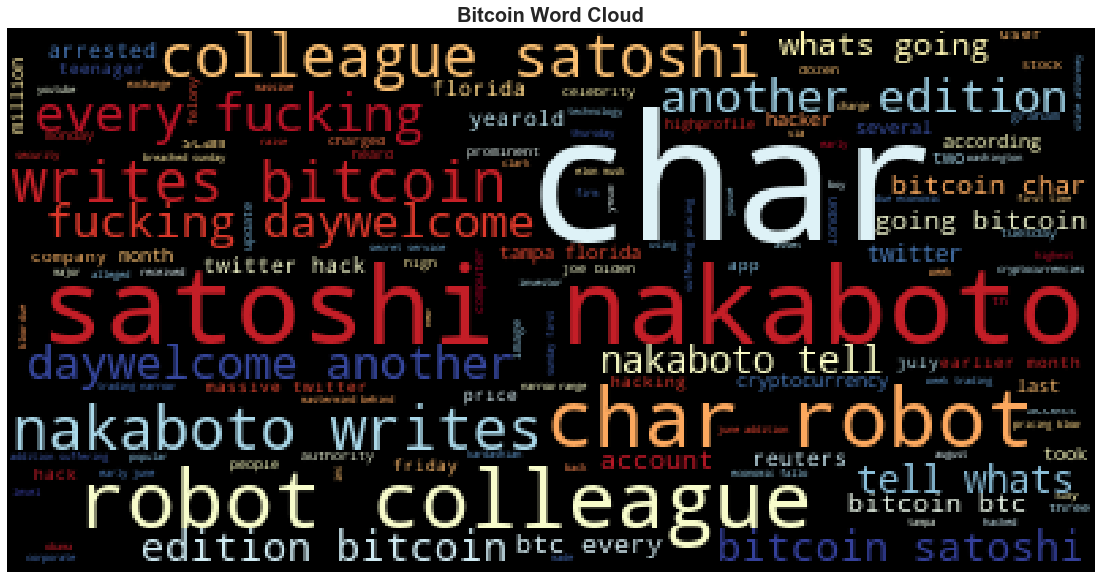

In [37]:

wordcloud = WordCloud(colormap="RdYlBu").generate(input_words)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

In [38]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
tokens_list = ethereum_df['tokens'].values.tolist()
corpus = [item for sublist in tokens_list  for item in sublist]
input_words = ' '.join(corpus)

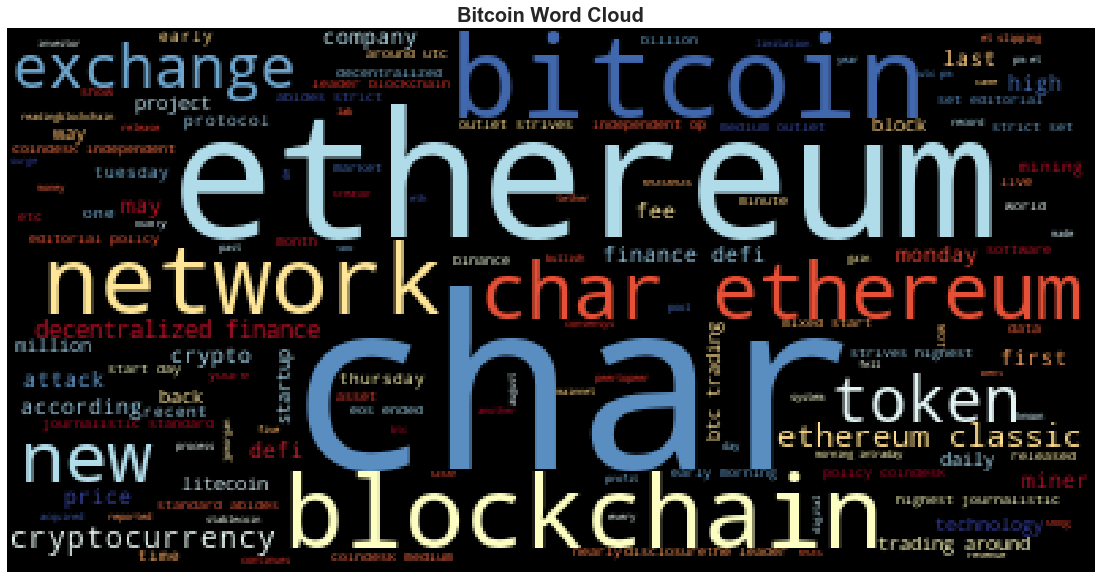

In [39]:
wordcloud = WordCloud(colormap="RdYlBu").generate(input_words)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [40]:
import spacy
from spacy import displacy

In [41]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [42]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [55]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
texts = bitcoin_df['text'].values.tolist()
bitcoin_text = ' '.join([text for text in texts])
bitcoin_text

'Authorities in Tampa, Florida have arrested a 17-year-old for being the alleged “mastermind” behind the Twitter Bitcoin hack that targeted several high-profile accounts on July 15th, 2020. His name h… [+463 chars] Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars] On July 15, a Discord user with the handle Kirk#5270 made an enticing proposition. I work for Twitter, they said, according to court documents released Friday. I can claim any name, let me know if yo… [+3660 chars] In April, the Secret Service seized 100 Bitcoins from Clark, NYT reports. Weeks later, Bennett received a letter explaining that the Secret Service had recovered 100 of his Bitcoins. The letter cited… [+884 chars] The bitcoin bulls are back in town.\r\nThe price of bitcoin surged today by $1,268.19, reaching a six-month high of $11,203.90, or a one-day 

In [68]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(bitcoin_text)
# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [70]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(f"{ent.text} {ent.label_}")


Tampa GPE
Florida GPE
17-year-old DATE
Twitter Bitcoin ORG
July 15th, 2020 DATE
Casa PERSON
Colorado GPE
Coinbas ORG
July 15 DATE
Discord GPE
Twitter ORG
Friday DATE
April DATE
the Secret Service ORG
100 CARDINAL
Bitcoins ORG
Clark GPE
Weeks later DATE
Bennett PERSON
the Secret Service ORG
100 CARDINAL
bitcoin GPE
today DATE
1,268.19 MONEY
six-month DATE
11,203.90 MONEY
one-day DATE
12.73% PERCENT
months DATE
Guy PERSON
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
Earlier this month DATE
Twitter ORG
Elon Musk PERSON
Joe Biden PERSON
Barack Obama PERSON
Bill Gates PERSON
Jeff Bezos PERSON
Andrew Warren PERSON
today DATE
30 CARDINAL
17-year-old DATE
Tampa GPE
Florida GPE
VPN PRODUCT
Reuters ORG
several weeks DATE
bitcoin GPE
10,000 MONEY
Sunday DATE
first ORDINAL
early June DATE
Reuters ORG
several weeks DATE
bitcoin GPE
10,000 MONEY
Sunday DATE
first ORDINAL
early June DATE
Tampa GPE
Friday DATE
Twitter ORG
earlier this month DATE
Joe Biden PERSON
Bill G PERSON
Reuters

---

## Ethereum NER

In [71]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
texts = ethereum_df['text'].values.tolist()
ethereum_text = ' '.join([text for text in texts])
ethereum_text

"TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and bloc… [+1286 chars] LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars] NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain platform Quorum, the companies said on Tuesday. \r\nAs part of the dea… [+1915 chars] An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypto assets have potential.\r\nThe pseudonymous trader known as Joe007 says UNUS SED LEO (LEO) may be a soli… [+1503 chars] REUTERS/Rick Wilking\r\n<ul><li>Michael Novogratz told Bloomberg the price of gold could certainly get up to $3,000.\xa0</li><li>The 

In [72]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(ethereum_text)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Ethereum NER"


In [73]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [74]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(f"{ent.text} {ent.label_}")

29.81 MONEY
August 17 DATE
97% PERCENT
LONDON GPE
Reuters ORG
about 20% PERCENT
NEW YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Rick Wilking PERSON
ul><li PERSON
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000 MONEY
The Galaxy Digital ORG
Fed ORG
August DATE
4 DATE
2020 DATE
5 CARDINAL
Crypto PERSON
the last week DATE
Bitcoin GPE
18% PERCENT
the last seven days DATE
over 30% PERCENT
the last week DATE
first ORDINAL
Bitcoin GPE
11,000 MONEY
nearly a year DATE
Tuesday DATE
US GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
first ORDINAL
Medalla PERSON
the Ethereum Foundation ORG
ul><li PERSON
Medalla GPE
Aug. 2 DATE
418 MONEY
5 minutes TIME
25% PERCENT
Binance Futures ORG
ETH ORG
as low as $302 MONEY
385 MONEY
10 minutes TIME
one hundred dollar MONEY
Fintech ORG
Five years ago this week DATE
first ORDINAL
Bitcoins ORG
